<a href="https://colab.research.google.com/github/Shahtanishka/ybiprojects/blob/main/hand_written_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digit Prediction**

Objective :


Handwritten digit recognition is the process to provide the ability to machines to recognize human handwritten digits. It is an important application of machine learning, particularly in the field of computer vision. The task involves identifying handwritten digits from an image and classifying them into the corresponding numerical values.

Import library

In [24]:
import pandas as pd

In [25]:
import numpy as np

In [26]:
import matplotlib.pyplot as plt

Import Data

In [27]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

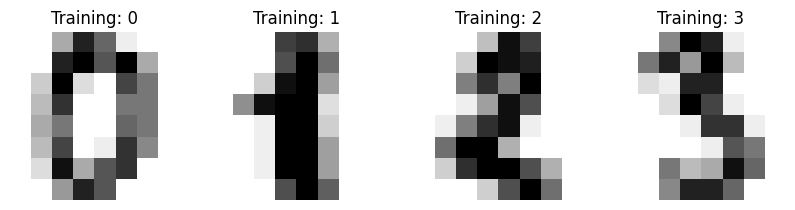

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Data Preprocesing

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

Scaning image data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [28]:
data.min()

0.0

In [29]:
data.max()

1.0

In [30]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train test split data

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data,df.target,test_size=0.3)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier()

In [37]:
rf.fit(X_train,y_train)

RandomForestClassifier()

Predict Test Data

In [38]:
y_pred = rf.predict(X_test)

In [39]:
y_pred

array([1, 6, 8, 8, 0, 9, 0, 2, 6, 8, 0, 9, 6, 6, 5, 3, 6, 7, 0, 4, 7, 7,
       2, 2, 0, 6, 2, 7, 0, 0, 2, 3, 2, 3, 2, 0, 8, 4, 3, 2, 3, 1, 8, 4,
       4, 5, 3, 5, 9, 6, 3, 4, 4, 8, 8, 6, 5, 9, 8, 7, 5, 9, 9, 3, 3, 4,
       3, 5, 9, 5, 4, 3, 5, 3, 6, 5, 4, 3, 5, 8, 7, 5, 2, 3, 3, 7, 1, 5,
       2, 3, 1, 2, 1, 7, 8, 4, 1, 4, 2, 3, 3, 7, 7, 3, 4, 5, 2, 9, 4, 2,
       8, 9, 5, 6, 2, 6, 0, 6, 2, 5, 9, 5, 5, 1, 1, 3, 4, 9, 6, 2, 4, 3,
       9, 5, 7, 1, 3, 5, 1, 2, 2, 3, 1, 8, 7, 5, 7, 5, 5, 4, 1, 2, 8, 1,
       5, 7, 9, 7, 5, 4, 5, 3, 5, 0, 6, 8, 2, 2, 5, 4, 3, 9, 9, 4, 0, 8,
       6, 3, 0, 8, 3, 8, 4, 9, 4, 1, 1, 4, 5, 0, 4, 9, 5, 0, 0, 7, 2, 9,
       3, 3, 7, 0, 6, 6, 1, 2, 3, 2, 5, 0, 3, 0, 1, 5, 0, 9, 9, 5, 8, 2,
       4, 4, 2, 6, 5, 5, 0, 3, 0, 2, 0, 8, 2, 8, 5, 5, 7, 0, 1, 9, 3, 8,
       7, 9, 2, 6, 1, 6, 9, 6, 4, 1, 2, 6, 5, 7, 5, 5, 4, 6, 6, 5, 1, 3,
       1, 8, 3, 2, 6, 4, 1, 3, 8, 4, 3, 9, 6, 4, 3, 2, 5, 9, 8, 4, 4, 2,
       2, 5, 1, 5, 7, 1, 8, 6, 6, 2, 7, 8, 9, 1, 4,

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
confusion_matrix(y_test, y_pred)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 64,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 62,  0,  3,  0,  1,  0,  2],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 67,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  5,  0,  1,  0,  0,  0,  0, 54,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 42]])

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.88      1.00      0.93        43
           2       1.00      0.98      0.99        65
           3       0.98      0.91      0.95        68
           4       0.98      1.00      0.99        50
           5       0.93      0.97      0.95        69
           6       0.98      1.00      0.99        48
           7       0.98      1.00      0.99        47
           8       1.00      0.89      0.94        61
           9       0.93      0.95      0.94        44

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

